In [ ]:
!wget "http://motioncore-umh.cs.umn.edu/4980/college.csv"

--2023-02-06 23:47:10--  http://motioncore-umh.cs.umn.edu/4980/college.csv
Resolving motioncore-umh.cs.umn.edu (motioncore-umh.cs.umn.edu)... 128.101.106.27
Connecting to motioncore-umh.cs.umn.edu (motioncore-umh.cs.umn.edu)|128.101.106.27|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78854 (77K) [text/csv]
Saving to: ‘college.csv’

college.csv         100%[===================>]  77.01K  --.-KB/s    in 0.04s   

2023-02-06 23:47:10 (2.08 MB/s) - ‘college.csv’ saved [78854/78854]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Part 1: Data Preparation

In [ ]:
df = pd.read_csv("college.csv")
df['Selective'] = df['Top10perc'] > 50
print(df)

                             School Private   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University     Yes   1660    1232     721         23   
1                Adelphi University     Yes   2186    1924     512         16   
2                    Adrian College     Yes   1428    1097     336         22   
3               Agnes Scott College     Yes    417     349     137         60   
4         Alaska Pacific University     Yes    193     146      55         16   
..                              ...     ...    ...     ...     ...        ...   
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         28   

     Top25perc  F.Undergrad

In [ ]:
features = df[[ 'Outstate', 'S.F.Ratio', 'Apps', 'Accept', 'Selective']]

In [ ]:
import seaborn as sns
sns.set(font_scale=1.2)

Part 2: Data Visualization

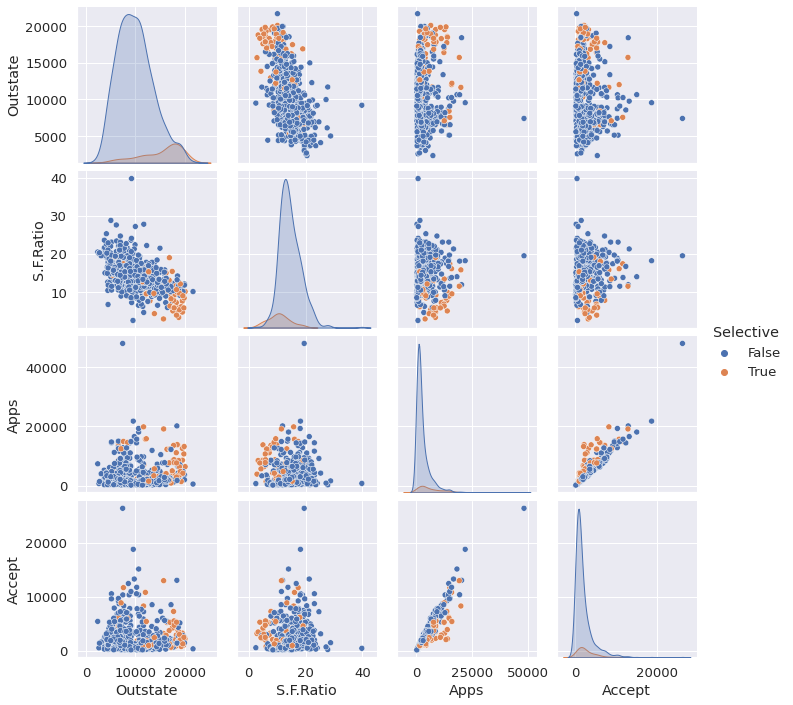

In [ ]:
sns.pairplot(data = features, x_vars=['Outstate','S.F.Ratio', 'Apps', 'Accept'], y_vars =['Outstate', 'S.F.Ratio', 'Apps', 'Accept'], hue='Selective')

Part 4: Model Evaluation

In [ ]:
#taken from lecture
def normalize(X):
  x_mean = X.mean(axis=0)
  X -= X.mean(axis=0) # subtract the mean for each feature
  x_std = X.std(axis=0)
  X /= X.std(axis=0)  # divide each feature by its standard deviation
  return (x_mean, x_std, X)

In [ ]:
#taken from lecture
def train_test_split(X,y,test_size):
  numRows = y.size                     #number or rows in the entire dataset
  splitPoint = int(test_size*numRows)  #the row index test_size% of the way through
  p = np.random.permutation(numRows)   #array for shuffling data
  X = X[p]
  y = y[p]
  
  #Training data array
  X_train = X[:splitPoint]  # training features
  y_train = y[:splitPoint]  # training labels
  
  #Testing data array
  X_test = X[splitPoint:]  # testing features
  y_test = y[splitPoint:] # testing labels

  return X_train, X_test, y_train, y_test

In [ ]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#taken from lecture
def knn_classifier(X_train, y_train, X_test):
  # instantiate learning model and fit data
  knn = KNeighborsClassifier(n_neighbors=k)    
  knn.fit(X_train, y_train)

  # predict the response
  pred = knn.predict(X_test)
  return pred

In [ ]:
#taken from lecture
def accuracy(classify, X_train, y_train, X_test, y_test):
  pred = classify(X_train, y_train, X_test)
  correct_pred = (pred == y_test)
  total_preds = y_test.size
 # print(correct_pred)
  return correct_pred.sum()/total_preds

In [ ]:
def precision(classify, X_train, y_train, X_test, y_test):
  pred = classify(X_train, y_train, X_test)
  correct = (pred == y_test)
  FP = ~correct & (pred == True)
  TP = correct & (pred == True)
  if (TP.sum() + FP.sum()) == 0:
    return 0
  return TP.sum() / (TP.sum() + FP.sum())

In [ ]:
def recall(classify, X_train, y_train, X_test, y_test):
  pred = classify(X_train, y_train, X_test)
  correct = (pred == y_test)
  FN = ~correct & (pred == False)
  TP = correct & (pred == True)
  if (TP.sum() + FN.sum()) == 0:
    return 0
  return TP.sum() / (TP.sum() + FN.sum())

In [ ]:
def f1_score(precision, recall):
  if(precision + recall) == 0:
    return 0
  return 2 * ((precision * recall) / (precision + recall))

In [ ]:
X = df[['Outstate', 'S.F.Ratio']].to_numpy()
Y = df['Selective'].to_numpy()

results = normalize(X)
X = results[2]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,0.20)

4.1. KNN with small K

In [ ]:
k = 1
accuracy1 = accuracy(knn_classifier, X_train, y_train, X_train, y_train)
precision1 = precision(knn_classifier, X_train, y_train, X_train, y_train)
recall1 = recall(knn_classifier, X_train, y_train, X_train, y_train)
f1_score1 = f1_score(precision1, recall1)
print("Precision on Training Data: " + str(precision1))
print("Recall on Training Data: " + str(recall1))
print("Accuracy on Training Data: "+ str(accuracy1))
print("F1 score on Training Data:" + str(f1_score1))
accuracy1test = accuracy(knn_classifier, X_train, y_train, X_test, y_test)
precision1test = precision(knn_classifier, X_train, y_train, X_test, y_test)
recall1test = recall(knn_classifier, X_train, y_train, X_test, y_test)
f1_score1test = f1_score(precision1test, recall1test)
print("\n")
print("Precision on Test Data: " + str(precision1test))
print("Recall on Test Data: " + str(recall1test))
print("Accuracy on Test Data: "+ str(accuracy1test))
print("F1 score on Test Data:" + str(f1_score1test))

Precision on Training Data: 1.0
Recall on Training Data: 1.0
Accuracy on Training Data: 1.0
F1 score on Training Data:1.0


Precision on Test Data: 0.38333333333333336
Recall on Test Data: 0.36507936507936506
Accuracy on Test Data: 0.8762057877813505
F1 score on Test Data:0.3739837398373984


4.2. KNN with large K

In [ ]:
k = 20
accuracy2 = accuracy(knn_classifier, X_train, y_train, X_train, y_train)
precision2 = precision(knn_classifier, X_train, y_train, X_train, y_train)
recall2 = recall(knn_classifier, X_train, y_train, X_train, y_train)
f1_score2 = f1_score(precision2, recall2)
print("Precision on Training Data: " + str(precision2))
print("Recall on Training Data: " + str(recall2))
print("Accuracy on Training Data: "+ str(accuracy2))
print("F1 score on Training Data: " + str(f1_score2))
accuracy2test = accuracy(knn_classifier, X_train, y_train, X_test, y_test)
precision2test = precision(knn_classifier, X_train, y_train, X_test, y_test)
recall2test = recall(knn_classifier, X_train, y_train, X_test, y_test)
f1_score2test = f1_score(precision2test, recall2test)
print("\n")
print("Precision on Test Data: " + str(precision2test))
print("Recall on Test Data: " + str(recall2test))
print("Accuracy on Test Data: "+ str(accuracy2test))
print("F1 score on Test Data: " + str(f1_score2test))

Precision on Training Data: 1.0
Recall on Training Data: 0.13333333333333333
Accuracy on Training Data: 0.9161290322580645
F1 score on Training Data: 0.23529411764705882


Precision on Test Data: 0.875
Recall on Test Data: 0.1111111111111111
Accuracy on Test Data: 0.9083601286173634
F1 score on Test Data: 0.19718309859154926


4.3. Classifer that says all schools are selective

In [ ]:
def all_selective_classifier(X_train, y_train, X_test):
  result = [True] * len(X_test)
  #print(result)
  return np.array(result)

In [ ]:
accuracy3 = accuracy(all_selective_classifier, X_train, y_train, X_train, y_train)
precision3 = precision(all_selective_classifier, X_train, y_train, X_train, y_train)
recall3 = recall(all_selective_classifier, X_train, y_train, X_train, y_train)
f1_score3 = f1_score(precision3, recall3)
print("Precision on Training Data: " + str(precision3))
print("Recall on Training Data: " + str(recall3))
print("Accuracy on Training Data: "+ str(accuracy3))
print("F1 score on Training Data: " + str(f1_score3))
accuracy3test = accuracy(all_selective_classifier, X_train, y_train, X_test, y_test)
precision3test = precision(all_selective_classifier, X_train, y_train, X_test, y_test)
recall3test = recall(all_selective_classifier, X_train, y_train, X_test, y_test)
f1_score3test = f1_score(precision3test, recall3test)
print("\n")
print("Precision on Test Data: " + str(precision3test))
print("Recall on Test Data: " + str(recall3test))
print("Accuracy on Test Data: "+ str(accuracy3test))
print("F1 score on Test Data: " + str(f1_score3test))

Precision on Training Data: 0.0967741935483871
Recall on Training Data: 1.0
Accuracy on Training Data: 0.0967741935483871
F1 score on Training Data: 0.17647058823529413


Precision on Test Data: 0.10128617363344052
Recall on Test Data: 1.0
Accuracy on Test Data: 0.10128617363344052
F1 score on Test Data: 0.18394160583941607


4.4. Classifier that says no schools are selective

In [ ]:
def all_not_selective_classifier(X_train, y_train, X_test):
  result = [False] * len(X_test)
  return np.array(result)

In [ ]:
accuracy4 = accuracy(all_not_selective_classifier, X_train, y_train, X_train, y_train)
precision4 = precision(all_not_selective_classifier, X_train, y_train, X_train, y_train)
recall4 = recall(all_not_selective_classifier, X_train, y_train, X_train, y_train)
f1_score4 = f1_score(precision4, recall4)
print("Precision on Training Data: " + str(precision4))
print("Recall on Training Data: " + str(recall4))
print("Accuracy on Training Data: "+ str(accuracy4))
print("F1 score on Training Data: " + str(f1_score4))
accuracy4test = accuracy(all_not_selective_classifier, X_train, y_train, X_test, y_test)
precision4test = precision(all_not_selective_classifier, X_train, y_train, X_test, y_test)
recall4test = recall(all_not_selective_classifier, X_train, y_train, X_test, y_test)
f1_score4test = f1_score(precision4test, recall4test)
print("\n")
print("Precision on Test Data: " + str(precision4test))
print("Recall on Test Data: " + str(recall4test))
print("Accuracy on Test Data: "+ str(accuracy4test))
print("F1 score on Test Data: " + str(f1_score4test))

Precision on Training Data: 0
Recall on Training Data: 0.0
Accuracy on Training Data: 0.9032258064516129
F1 score on Training Data: 0


Precision on Test Data: 0
Recall on Test Data: 0.0
Accuracy on Test Data: 0.8987138263665595
F1 score on Test Data: 0


Part 5: Applying the Model

5a. Private vs Public School

In [ ]:
x_5a = df[['Apps', 'Accept', 'Enroll', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']].to_numpy()
y_5a = df['Private'].to_numpy()
results = normalize(x_5a)
x_5a_mean = results[0]
x_5a_std = results[1]
x_5a = results[2]
new_school = [[5000, 2600, 1000, 4300, 500, 14000, 5000, 600, 1200, 84, 90, 12.1, 30, 15700, 78]]
new_school -= x_5a_mean
new_school /= x_5a_std

In [ ]:
#Finding the best value of k
#taken from lecture
ks = np.arange(1,20)
test_acc_list = []
train_acc_list = []
X_train, X_test, y_train, y_test = train_test_split(x_5a,y_5a,0.20)
for k_cur in ks:
  k = k_cur #awful hack
  test_acc = accuracy(knn_classifier, X_train, y_train, X_test, y_test)
  train_acc = accuracy(knn_classifier, X_train, y_train, X_train, y_train)
  test_acc_list.append(test_acc)
  train_acc_list.append(train_acc)

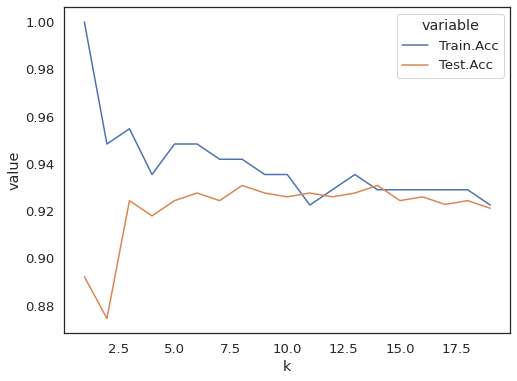

In [ ]:
#taken from lecture
from pylab import rcParams
sns.set(font_scale=1.2)
sns.set_style("white") #whitegrid white dark darkgrid

rcParams['figure.figsize'] = 8, 6
result = pd.DataFrame( {"k":ks,"Train.Acc":train_acc_list,"Test.Acc":test_acc_list} )
pd.melt(result, ['k'])
sns.lineplot(x="k",y="value", hue='variable', data=pd.melt(result, ['k']))

In [ ]:
k = 5
classification = knn_classifier(x_5a, y_5a, new_school)
print(classification)

['Yes']


5b. Selective vs. Not Selective

In [ ]:
#Finding the best value of k
#taken from lecture
ks = np.arange(1,20)
test_acc_list = []
train_acc_list = []
X_train, X_test, y_train, y_test = train_test_split(X,Y,0.20)
for k_cur in ks:
  k = k_cur #awful hack
  test_acc = accuracy(knn_classifier, X_train, y_train, X_test, y_test)
  train_acc = accuracy(knn_classifier, X_train, y_train, X_train, y_train)
  test_acc_list.append(test_acc)
  train_acc_list.append(train_acc)

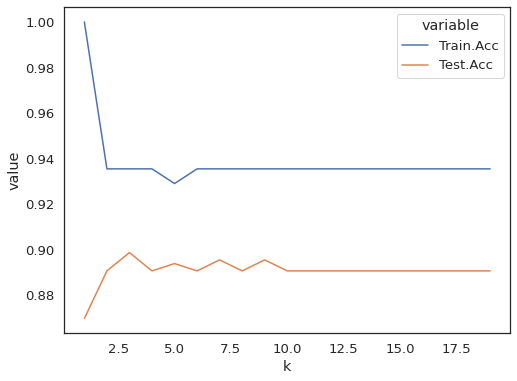

In [ ]:
#taken from lecture
from pylab import rcParams
sns.set(font_scale=1.2)
sns.set_style("white") #whitegrid white dark darkgrid

rcParams['figure.figsize'] = 8, 6
result = pd.DataFrame( {"k":ks,"Train.Acc":train_acc_list,"Test.Acc":test_acc_list} )
pd.melt(result, ['k'])
sns.lineplot(x="k",y="value", hue='variable', data=pd.melt(result, ['k']))

In [ ]:
new_school = [[14000, 12.1]] #Outstate, S.F.Ratio
known_features = df[['Outstate', 'S.F.Ratio']].to_numpy()
labels = df['Selective'].to_numpy()

results = normalize(known_features)
X = results[2]
x_mean = results[0]
x_std = results[1]
new_school -= x_mean
new_school /= x_std


In [ ]:
k = 4
classification = knn_classifier(known_features, labels, new_school)
print(classification)

[False]
